In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np
import os
from datetime import datetime
import arviz as az

In [33]:
def load_data(year_start='1900',interpolate=True,only_submission=True):
    path=r"/Users/severex_u_r1/Ipython/Kaggle/United Nations/data/"
    data=pd.read_csv(os.path.join(path,"TrainingSet.csv"),index_col=0)
    data.columns = [a.split()[0] if a[0].isdigit() else a for a in data.columns]
    submission=pd.read_csv(os.path.join(path,"SubmissionRows.csv"),index_col=0)
    if only_submission:
        data=data.loc[submission.index,:]
    data=data.loc[:,year_start:]
    if interpolate:
        data.loc[:,:'2007']=data.loc[:,:'2007'].interpolate(limit_direction='both',axis=1)
    return data,submission
data,submission=load_data('2002',only_submission=False)
data

,2002,2003,2004,2005,2006,2007,Country Name,Series Code,Series Name
0,3.769214,3.769214,3.769214,3.769214,3.769214,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,7.027746,7.027746,7.027746,7.027746,7.027746,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,8.244887,8.244887,8.244887,8.244887,8.244887,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
4,12.933105,12.933105,12.933105,12.933105,12.933105,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
5,18.996814,18.996814,18.996814,18.996814,18.996814,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection
...,...,...,...,...,...,...,...,...,...
286113,12.200000,12.200000,12.200000,12.200000,12.200000,12.200000,Zimbabwe,SG.VAW.BURN.ZS,Women who believe a husband is justified in be...
286114,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,Zimbabwe,SG.VAW.GOES.ZS,Women who believe a husband is justified in be...
286115,30.200000,30.200000,30.200000,30.200000,30.200000,30.200000,Zimbabwe,SG.VAW.NEGL.ZS,Women who believe a husband is justified in be...
286116,24.300000,24.300000,24.300000,24.300000,24.300000,24.300000,Zimbabwe,SG.VAW.REFU.ZS,Women who believe a husband is justified in be...


In [7]:
#data=data.loc[:,:'2007']
x=np.arange(1,len(data.columns)+1)
y=data.iloc[0].values
x

array([1, 2, 3, 4, 5, 6])

In [15]:
from theano import shared
with pm.Model() as my_first_model:
    a=pm.Normal('a',mu=0,sd=10)
    b=pm.Normal('b',mu=0,sd=10)
    g=pm.HalfCauchy('g',5)
    x_shared=shared(x)
    m=pm.Deterministic('m',a+b*x_shared)
    y_pred=pm.Normal('y_pred',mu=m,sd=g,observed=y)
    trace=pm.sample(2000,tune=1000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [g, b, a]
Sampling 4 chains, 63 divergences: 100%|██████████| 12000/12000 [00:08<00:00, 1490.20draws/s]
There were 35 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6549161119718778, but should be close to 0.8. Try to increase the number of tuning steps.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7041078410569305, but should be close to 0.8. Try to increase the number of tuning steps.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c256dff50>,
      dtype=object)

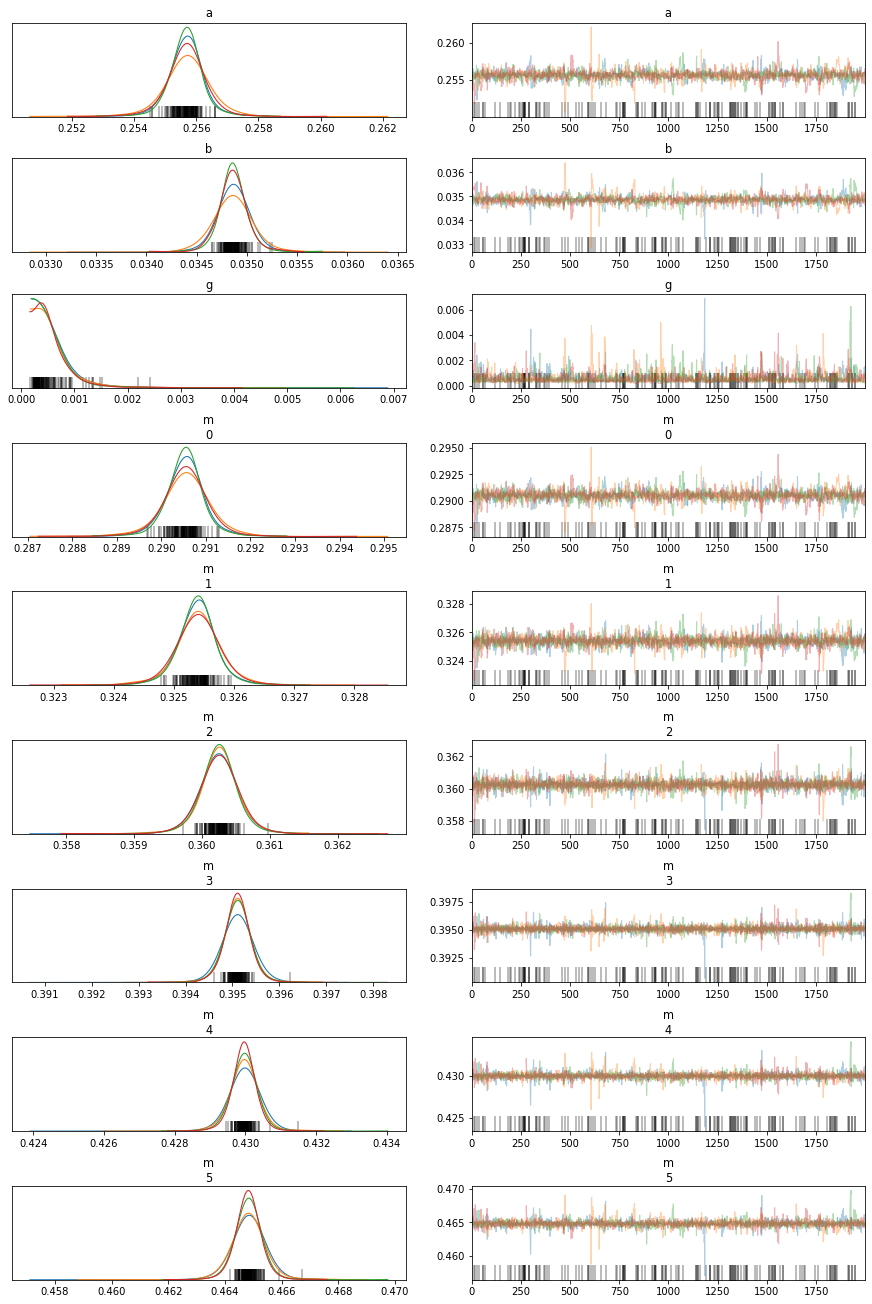

In [12]:
az.plot_trace(trace)

In [18]:
x_shared.set_value([7])
ppc=pm.sample_posterior_predictive(trace,samples=500,model=my_first_model)
ppc['y_pred'][:,0]

100%|██████████| 500/500 [00:00<00:00, 847.31it/s]


array([0.49888664, 0.49923545, 0.50004449, 0.49966466, 0.49895994,
       0.49892081, 0.49928499, 0.49954265, 0.49789566, 0.49928471,
       0.49890011, 0.49969848, 0.49929965, 0.49962905, 0.49999858,
       0.49992711, 0.50089248, 0.49838701, 0.4982451 , 0.49934337,
       0.49871206, 0.49966672, 0.49903879, 0.49936095, 0.49883917,
       0.49982543, 0.49899889, 0.49901967, 0.49868844, 0.49856029,
       0.5001517 , 0.49867141, 0.49802028, 0.50058192, 0.50040588,
       0.49834878, 0.49831462, 0.49880228, 0.49995742, 0.49917655,
       0.49838264, 0.49898852, 0.49984428, 0.50008424, 0.49892589,
       0.500072  , 0.49965507, 0.50025084, 0.49983566, 0.49962668,
       0.49978585, 0.49981955, 0.49957083, 0.49917784, 0.49893989,
       0.49928356, 0.49907961, 0.49959059, 0.49856427, 0.49822692,
       0.49803017, 0.49805188, 0.50091618, 0.50028503, 0.49948191,
       0.49917963, 0.50042473, 0.49974368, 0.50017589, 0.49938417,
       0.49957399, 0.49976559, 0.50021369, 0.50006837, 0.49975

# Иерархическая модель

In [84]:
#data=data.loc[:,:'2007']
ser_code='7.8'
temp_data=data[data['Series Code']==ser_code]
x=np.tile(np.arange(1,len(temp_data.loc[:,:'2007'].columns)+1),len(temp_data))
y=temp_data.loc[:,:'2007'].values.reshape(-1)
codes=pd.Categorical(temp_data.index).codes
M_group=max(codes)+1
id_group=np.repeat(codes,max(x))
M_group

154

In [85]:
from theano import shared
with pm.Model() as my_first_model:
    #априорные гиперраспределения 
    a_m=pm.Normal('a_m',mu=0,sd=10)
    a_sd=pm.HalfNormal('a_sd',10)
    b_m=pm.Normal('b_m',mu=0,sd=10)
    b_sd=pm.HalfNormal('b_sd',10)
    #априорные распределения
    a=pm.Normal('a',mu=a_m,sd=a_sd,shape=M_group)
    b=pm.Normal('b',mu=b_m,sd=b_sd,shape=M_group)
    sd=pm.HalfCauchy('sd',5)
    x_shared=shared(x)
    id_shared=shared(id_group)
    y_pred=pm.Normal('y_pred',mu=a[id_shared]+b[id_shared]*x_shared,sd=sd,observed=y)
    trace=pm.sample(2000,tune=1000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, b, a, b_sd, b_m, a_sd, a_m]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [01:03<00:00, 189.06draws/s]


In [90]:
x_shared.set_value(np.repeat([7],len(codes)))
id_shared.set_value(codes)
ppc=pm.sample_posterior_predictive(trace,samples=500,model=my_first_model)
ppc['y_pred'][:,0]

100%|██████████| 500/500 [00:01<00:00, 392.43it/s]


array([0.50022441, 0.49938279, 0.50018269, 0.49980277, 0.50042322,
       0.49930702, 0.49967153, 0.50049163, 0.49961834, 0.50023751,
       0.50057437, 0.50003399, 0.49953861, 0.49910493, 0.49967736,
       0.50001756, 0.49962555, 0.50072915, 0.49978844, 0.49960005,
       0.49973345, 0.49968406, 0.49976058, 0.49843259, 0.50011823,
       0.49997274, 0.49902147, 0.49919311, 0.5006074 , 0.49863588,
       0.49957986, 0.49962373, 0.49982281, 0.4990778 , 0.49878022,
       0.49995353, 0.49925817, 0.5001907 , 0.49967787, 0.49950368,
       0.49939243, 0.49929002, 0.49966443, 0.49967821, 0.49960419,
       0.49942399, 0.49826551, 0.49990493, 0.49922496, 0.49922754,
       0.49893881, 0.49970718, 0.49900491, 0.50028531, 0.49971592,
       0.49990652, 0.49935907, 0.49891725, 0.49915999, 0.49951685,
       0.49916151, 0.49859768, 0.49949797, 0.50007783, 0.49828725,
       0.49992383, 0.50044265, 0.49984574, 0.49942748, 0.49890835,
       0.50007211, 0.49948953, 0.499706  , 0.49965724, 0.49979

In [94]:
ppc['y_pred']

array([[0.50022441, 0.9611373 , 0.83661223, ..., 0.54304071, 0.59971885,
        0.79617765],
       [0.49938279, 0.9609571 , 0.83615816, ..., 0.54380808, 0.60035335,
        0.79592842],
       [0.50018269, 0.96049186, 0.83718169, ..., 0.54356078, 0.60153851,
        0.79753769],
       ...,
       [0.50033378, 0.96043645, 0.83706349, ..., 0.54411145, 0.6003357 ,
        0.79714862],
       [0.49971394, 0.96097016, 0.83668558, ..., 0.54261502, 0.60046946,
        0.79839328],
       [0.49948806, 0.95973863, 0.8374265 , ..., 0.54346871, 0.60101821,
        0.79750002]])

In [31]:
%%time
from theano import shared
# Полный обсчет
for ser_code in data['Series Code'].unique():
    temp_data=data[data['Series Code']==ser_code]
    x=np.tile(np.arange(1,len(temp_data.loc[:,:'2007'].columns)+1),len(temp_data))
    y=temp_data.loc[:,:'2007'].values.reshape(-1)
    codes=pd.Categorical(temp_data.index).codes
    M_group=max(codes)+1
    id_group=np.repeat(codes,max(x))
    with pm.Model() as my_first_model:
        #априорные гиперраспределения 
        a_m=pm.Normal('a_m',mu=0,sd=10)
        a_sd=pm.HalfNormal('a_sd',10)
        b_m=pm.Normal('b_m',mu=0,sd=10)
        b_sd=pm.HalfNormal('b_sd',10)
        #априорные распределения
        a=pm.Normal('a',mu=a_m,sd=a_sd,shape=M_group)
        b=pm.Normal('b',mu=b_m,sd=b_sd,shape=M_group)
        sd=pm.HalfCauchy('sd',5)
        x_shared=shared(x)
        id_shared=shared(id_group)
        y_pred=pm.Normal('y_pred',mu=a[id_shared]+b[id_shared]*x_shared,sd=sd,observed=y)
        trace=pm.sample(1500,tune=1000)
    #2008 предикт
    x_shared.set_value(np.repeat([7],len(codes)))
    id_shared.set_value(codes)
    ppc=pm.sample_posterior_predictive(trace,samples=100,model=my_first_model)
    if len(codes)==1:
        ppc['y_pred']=[0.0588908]
    submission['2008 [YR2008]'].loc[temp_data.index]=ppc['y_pred'][0]
    #2012 предикт
    x_shared.set_value(np.repeat([11],len(codes)))
    ppc=pm.sample_posterior_predictive(trace,samples=100,model=my_first_model)
    if len(codes)==1:
        ppc['y_pred']=[0.05119944]
    submission['2012 [YR2012]'].loc[temp_data.index]=ppc['y_pred'][0]
submission.to_csv('submission.csv')
submission

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, b, a, b_sd, b_m, a_sd, a_m]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [01:04<00:00, 155.68draws/s]
/Users/severex_u_r1/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 100/100 [00:00<00:00, 376.16it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, b, a, b_sd, b_m, a_sd, a_m]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [01:26<00:00, 115.87draws/s]
/Users/severex_u_r1/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller th

CPU times: user 1min 47s, sys: 6.37 s, total: 1min 54s
Wall time: 6min 47s


,2008 [YR2008],2012 [YR2012]
559,0.499448,0.639718
618,-0.028241,-0.003273
753,0.107955,0.095626
1030,0.001583,0.001627
1896,0.960431,0.957100
...,...,...
284474,0.129920,0.120393
285340,0.797789,0.800127
285399,0.119677,0.254320
285534,0.094015,0.090266
